# Loading the data

In [ ]:
# Load all the needed libraries for a machine learning project
import os, sys, time, random, math, datetime, pickle, warnings, json, re, string, glob, itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sweetviz as sv

# import sklearn
import sklearn.metrics as metrics
# import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.feature_selection as feature_selection
import sklearn.linear_model as linear_model
import sklearn.ensemble as ensemble
import sklearn.tree as tree
import sklearn.svm as svm
# import sklearn.cluster as cluster
import sklearn.neighbors as neighbors
import sklearn.neural_network as neural_network
# import sklearn.decomposition as decomposition
# import sklearn.pipeline as pipeline
# import sklearn.utils as utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader

# import cv2
# from PIL import Image
import tqdm

# Ignore all warning messages
warnings.filterwarnings('ignore')

In [ ]:
# loading the data
Ximg1 = pd.read_csv('data/Ximg1.csv')
Ximg2 = pd.read_csv('data/Ximg2.csv')
MyXimg1 = pd.read_csv('data/MyXimg1.csv')
MyXimg2 = pd.read_csv('data/MyXimg2.csv')
Xtab1 = pd.read_csv('data/Xtab1.csv')
Xtab2 = pd.read_csv('data/Xtab2.csv')
Y1 = pd.read_csv('data/Y1.csv')

# show the first 5 rows of the data
print('Ximg1')
display(Ximg1.head())
# print('Ximg2')
# display(Ximg2.head())
print('MyXimg1')
display(MyXimg1.head())
# print('MyXimg2')
# display(MyXimg2.head())
print('Xtab1')
display(Xtab1.head())
# print('Xtab2')
# display(Xtab2.head())
print('Y1')
display(Y1.head())

Ximg1


,h1,h2,h3,h4,h5,h6,h7,h8,img_filename
0,-0.400470,0.115542,-0.429741,0.391250,0.274615,-0.302454,0.172267,-0.285046,heart_509.png
1,-0.370681,0.109838,-0.413651,0.425773,0.218042,-0.278049,0.181184,-0.212044,heart_159.png
2,-0.351391,0.043292,-0.394782,0.379718,0.191864,-0.226267,0.145120,-0.253251,heart_502.png
3,-0.346954,0.077403,-0.428344,0.384614,0.244609,-0.259138,0.169757,-0.293084,heart_947.png
4,-0.368318,0.089293,-0.421365,0.402795,0.243602,-0.224189,0.157585,-0.300966,heart_1029.png


MyXimg1


,h1,h2,h3,h4,h5,h6,img_filename
0,0.835408,-0.242781,-0.080770,-0.355934,0.019748,-0.559586,heart_509.png
1,0.653406,0.186521,-0.296022,-0.612414,-0.135969,-0.634010,heart_159.png
2,0.877215,-0.168398,-0.366366,-0.718113,-0.015904,-0.395200,heart_502.png
3,0.658640,-0.272825,-0.209778,-0.392425,-0.004412,-0.619731,heart_947.png
4,0.659054,0.030241,-0.154183,-0.449815,-0.070592,-0.559888,heart_1029.png


Xtab1


,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png


Y1


,Y
0,0.26
1,0.08
2,0.27
3,0.08
4,0.06


In [87]:
# concatinate Y1 to Xtab1
Xtab1 = pd.concat([Xtab1, Y1], axis=1)
print('Xtab1')
display(Xtab1.head())

Xtab1


,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06


# Plotting the data

Ximg1 columns
14 Index(['age', 'blood pressure', 'blood type', 'cholesterol', 'hemoglobin',
       'physical activity', 'sarsaparilla', 'smurfberry liquor',
       'smurfin donuts', 'temperature', 'testosterone', 'weight',
       'img_filename', 'Y'],
      dtype='object')
Ximg1 distribution


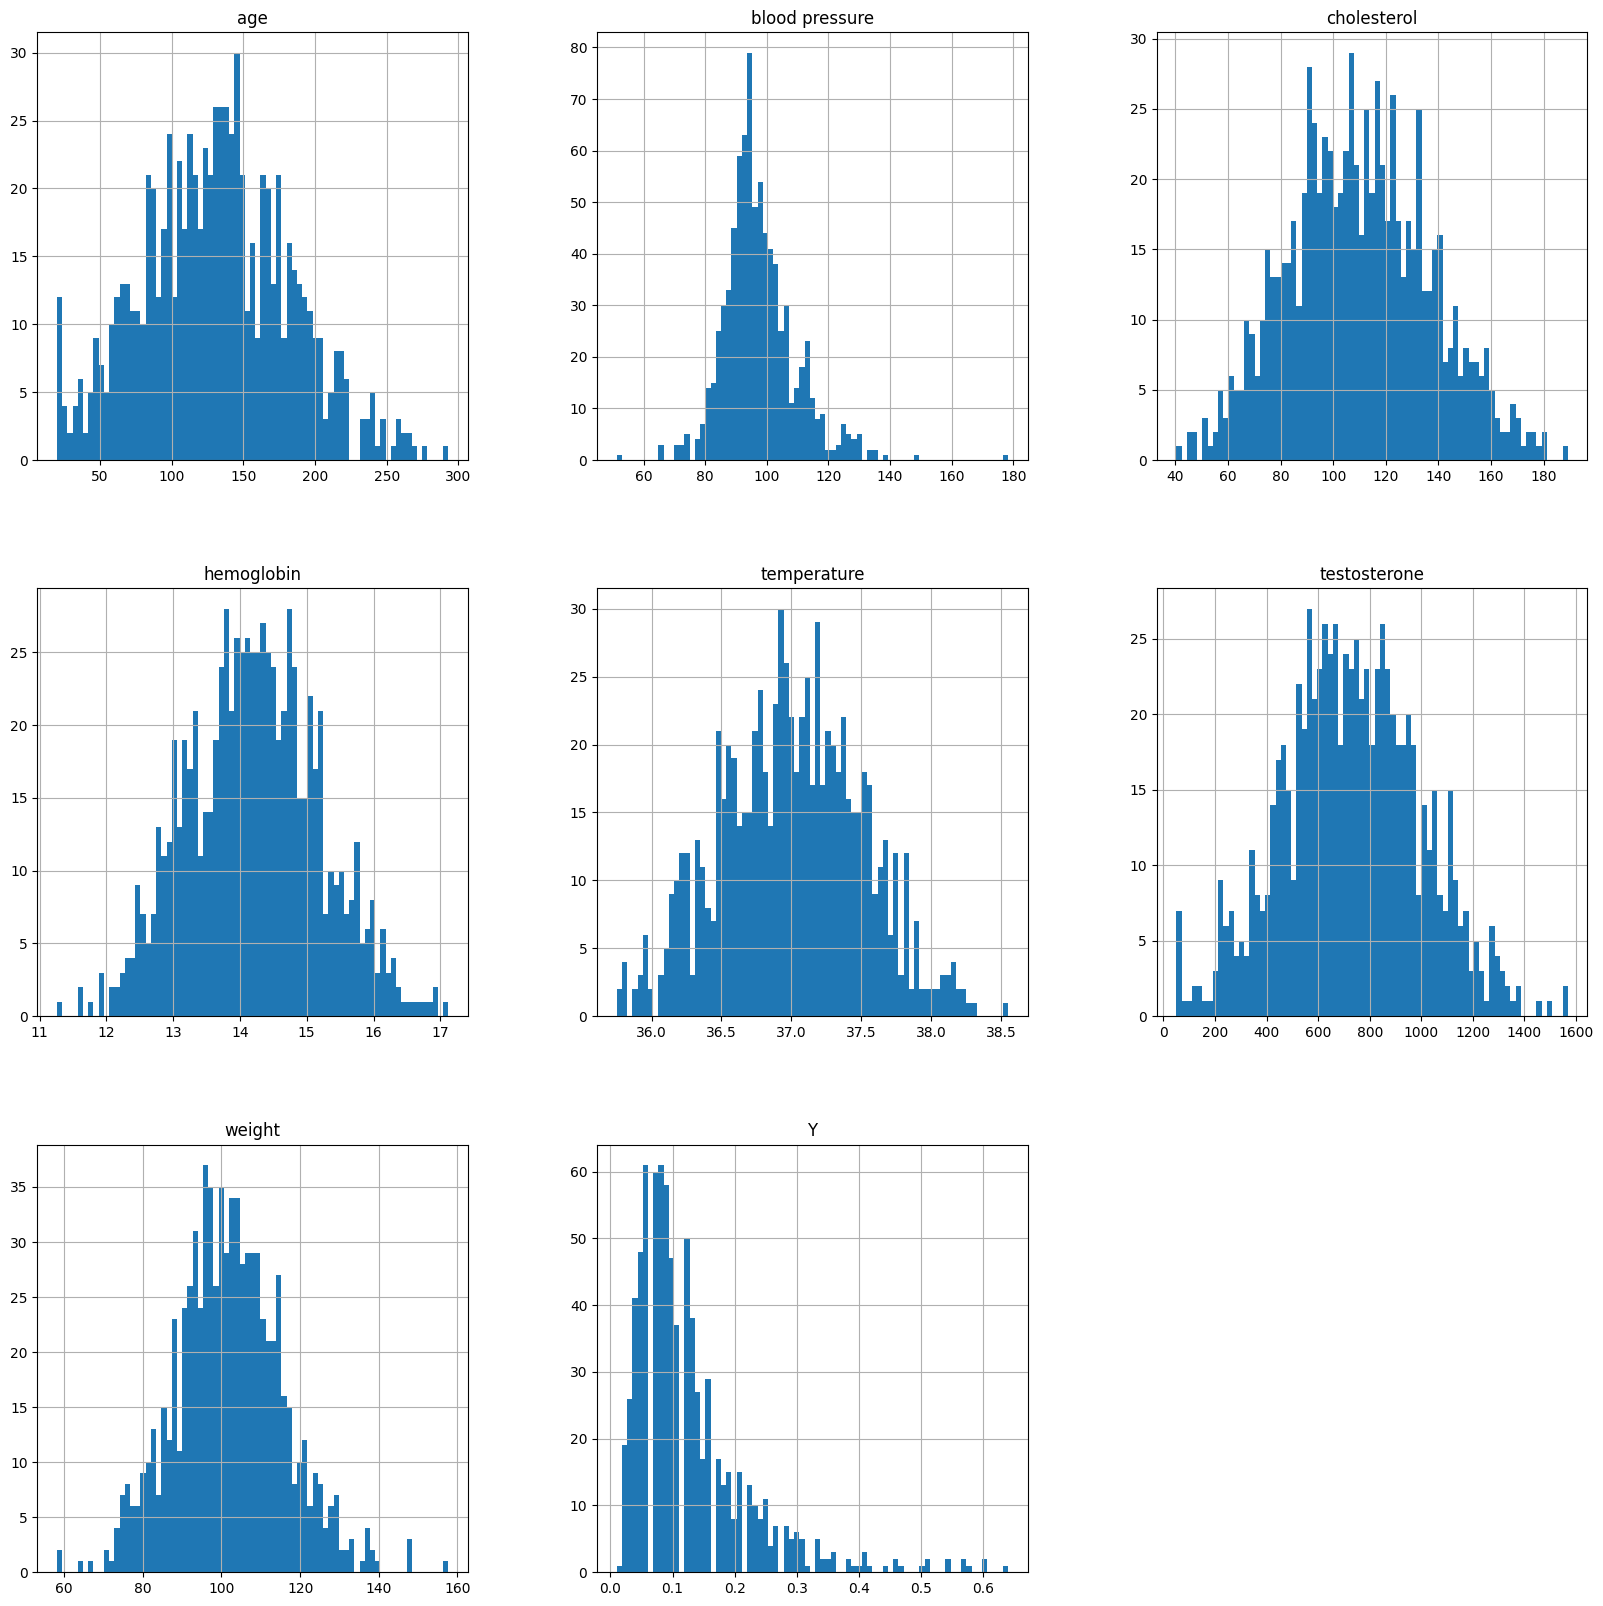

Xtab1 non numerical columns
6 Index(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor',
       'smurfin donuts', 'img_filename'],
      dtype='object')
Xtab1 non numerical columns distribution


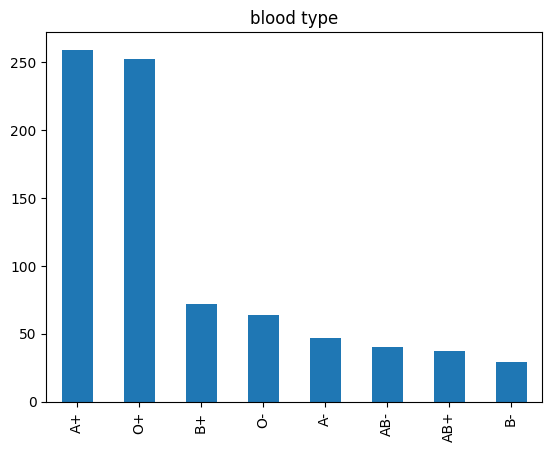

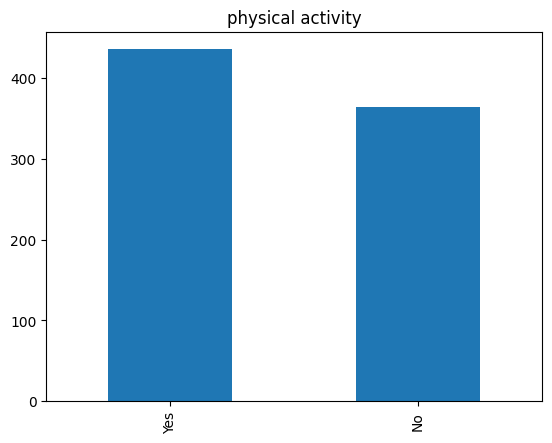

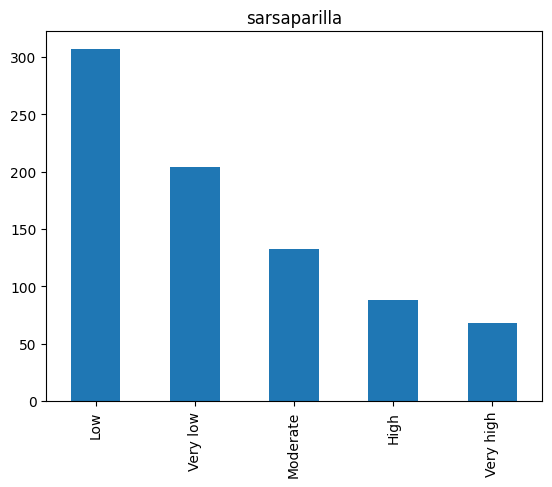

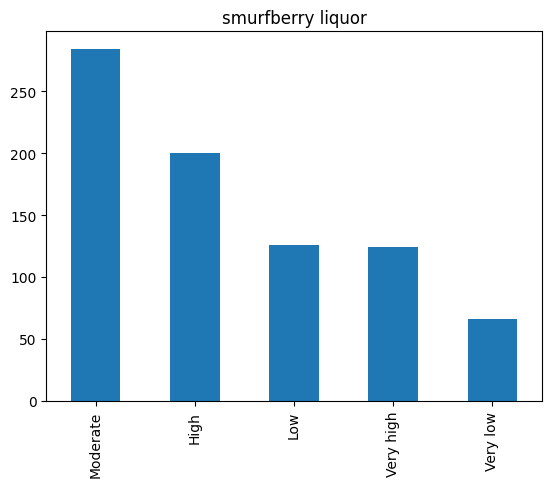

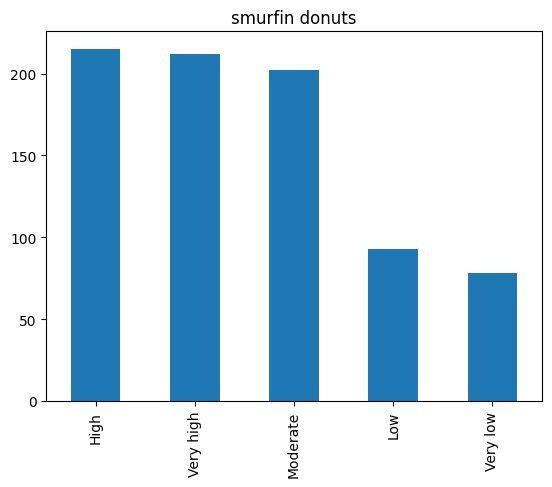

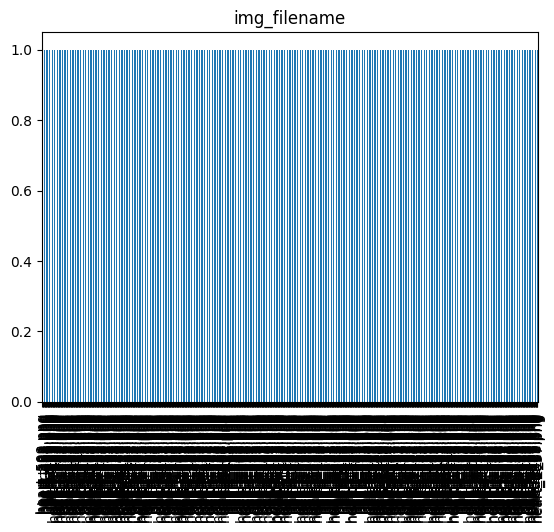

In [88]:
# get the columns of the data
print('Ximg1 columns')
columns = Xtab1.columns
print(len(columns),columns)
# plot the distribution of the data
print('Ximg1 distribution')
Xtab1.hist(figsize=(20,20), bins=75)
plt.show()
# Non numerical columns
print('Xtab1 non numerical columns')
non_numerical_columns = Xtab1.select_dtypes(exclude=[np.number]).columns
print(len(non_numerical_columns),non_numerical_columns)
# plot the distribution of the frequency of the non numerical columns
print('Xtab1 non numerical columns distribution')
for column in non_numerical_columns:
    Xtab1[column].value_counts().plot(kind="bar", title=column)
    plt.show()

In [89]:
# plot the amount of missing data for each column
print('Xtab1 missing data')
missing_data = Xtab1.isnull().sum()
missing_data

Xtab1 missing data


age                  0
blood pressure       0
blood type           0
cholesterol          0
hemoglobin           0
physical activity    0
sarsaparilla         0
smurfberry liquor    0
smurfin donuts       0
temperature          0
testosterone         0
weight               0
img_filename         0
Y                    0
dtype: int64

Y1 distribution


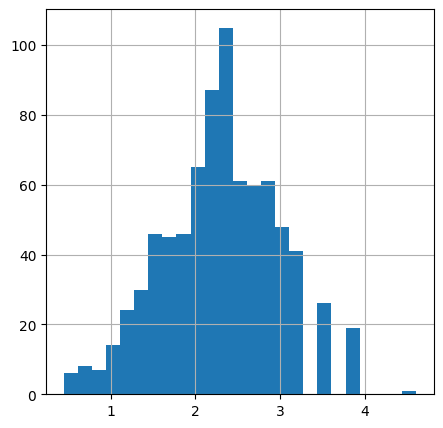

In [90]:
# plot the log of the attribute Y in tab1
print('Y1 distribution')
log_Y1 = np.log(Xtab1['Y']) * -1
log_Y1.hist(figsize=(5,5), bins=25)

# add it to the data
Xtab1['LOG_Y'] = log_Y1

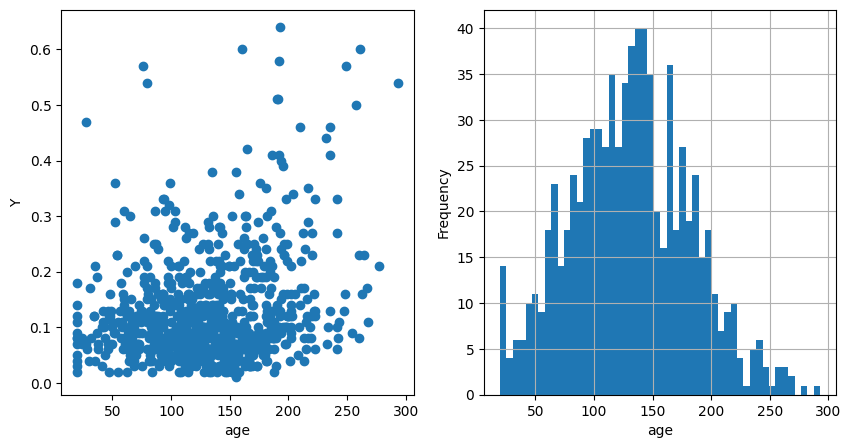

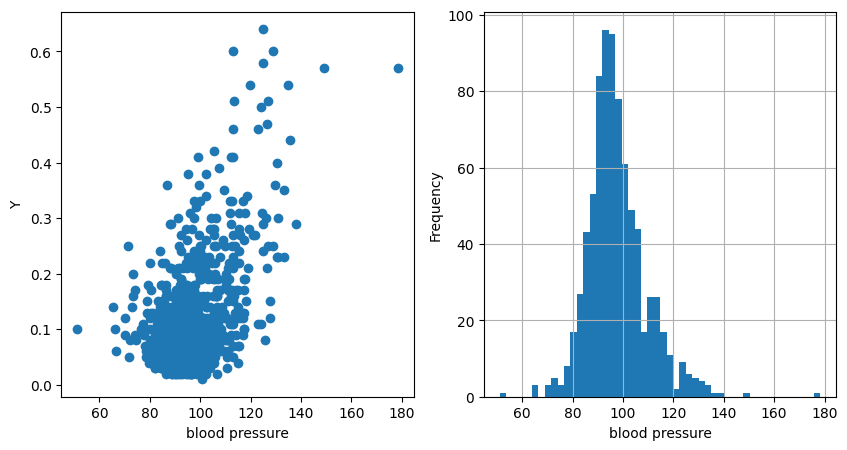

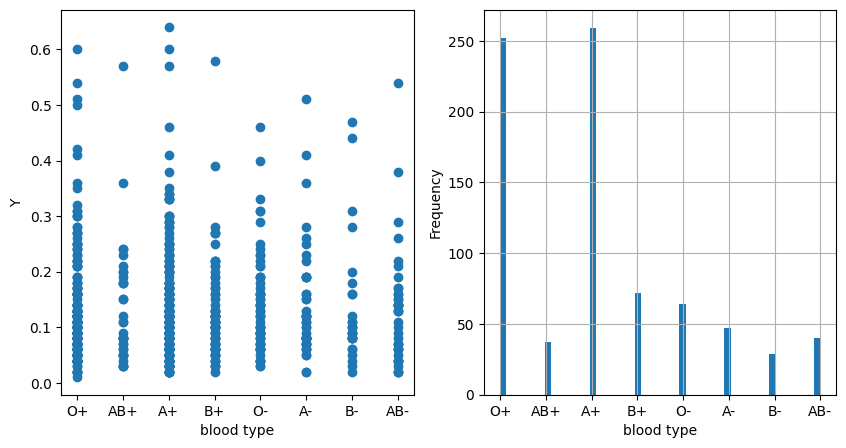

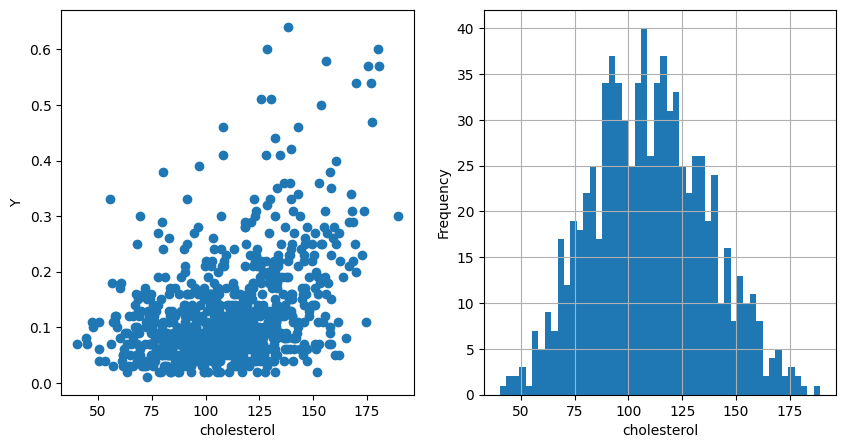

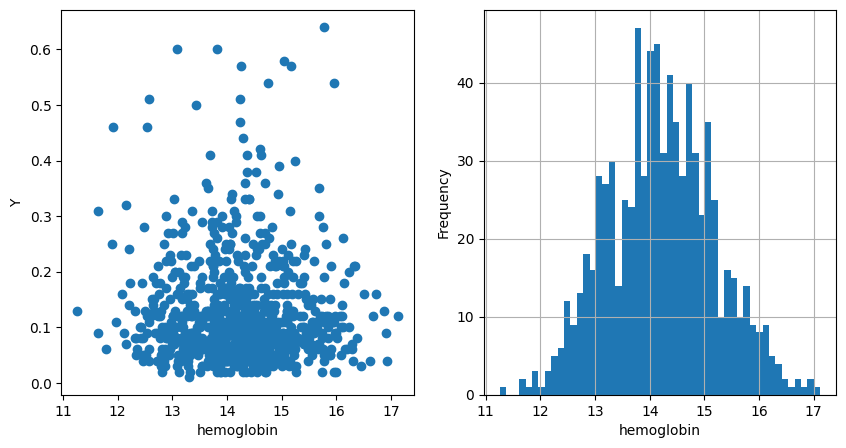

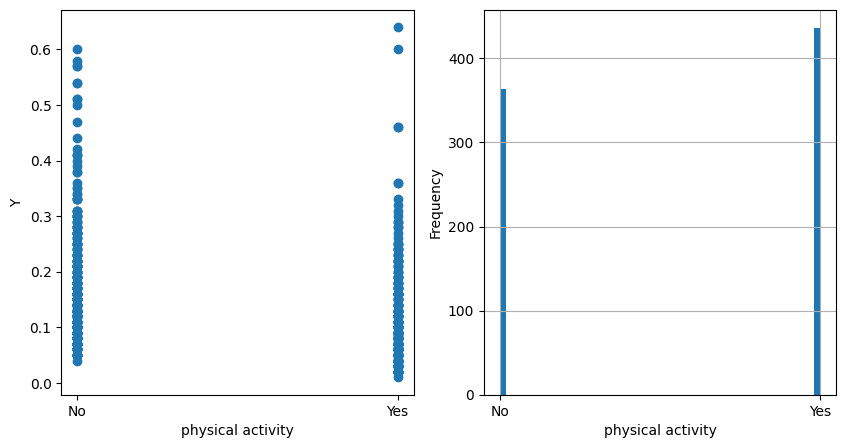

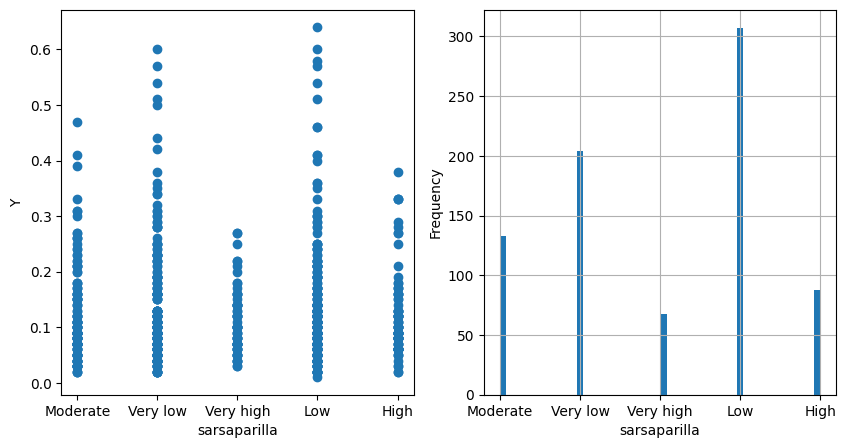

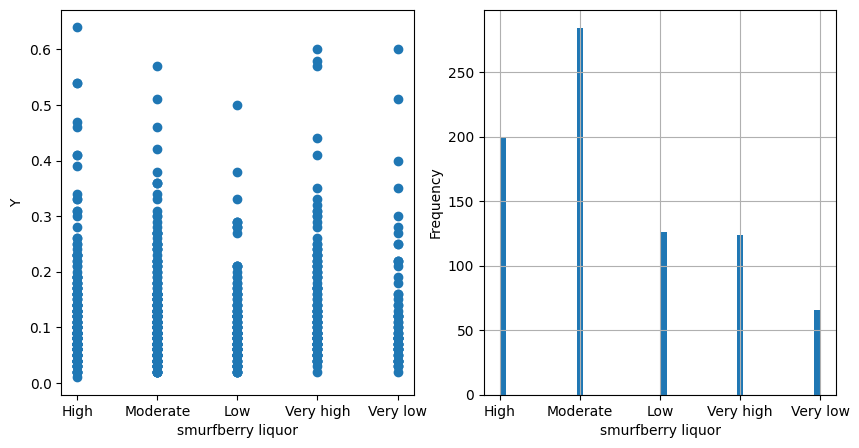

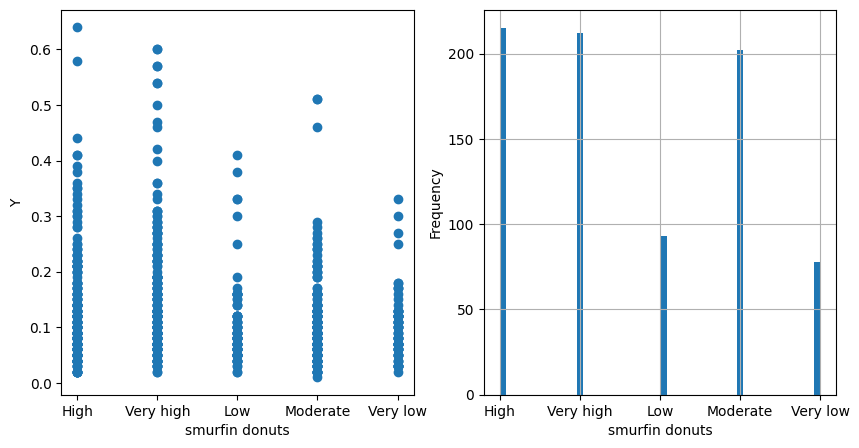

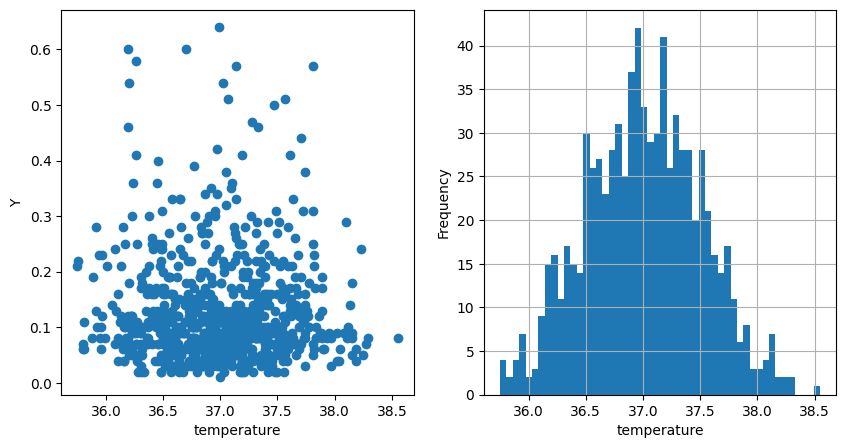

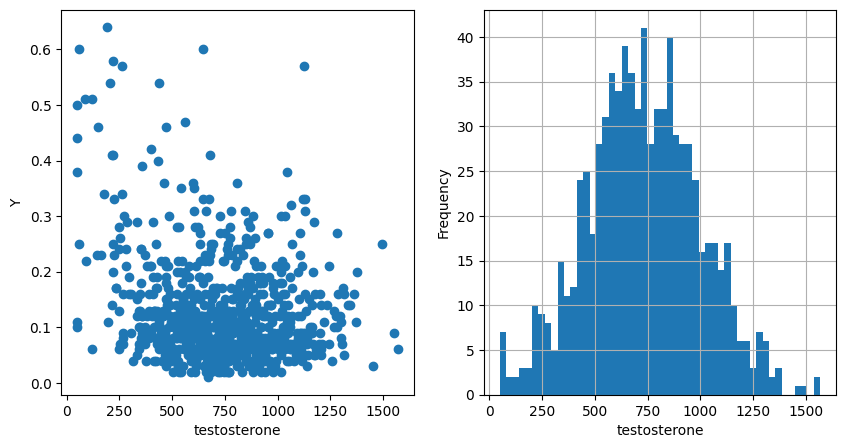

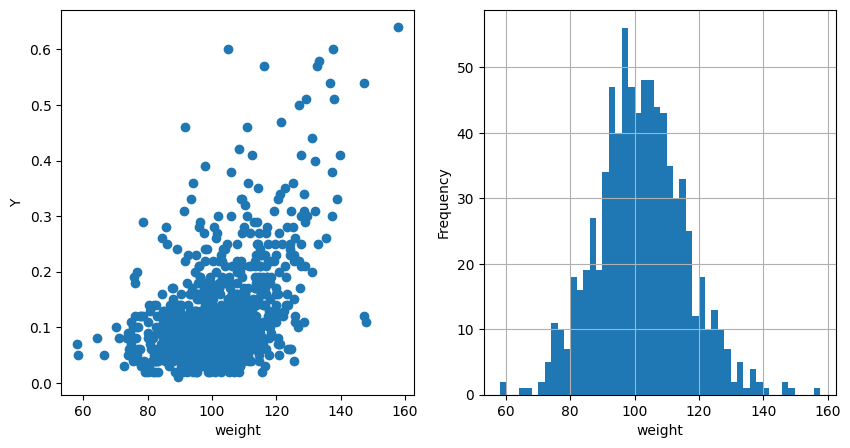

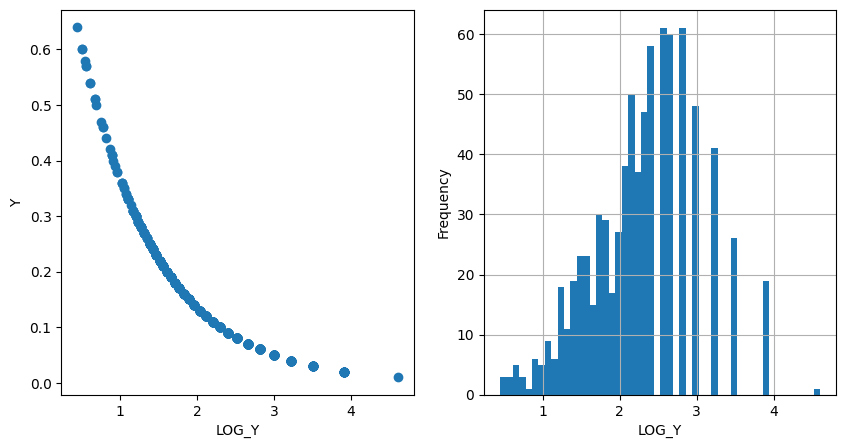

In [91]:
# Plot the corelation between each attribute and the target attribute and next to it plot a hist the frequency of the attribute
target = 'Y'
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['img_filename', 'Y'])
for column in columns:
    if column != target:
        plt.figure(figsize=(5,5))
        plt.subplot(1, 2, 1)
        plt.scatter(Xtab1[column], Xtab1[target])
        plt.xlabel(column)
        plt.ylabel(target)
        plt.subplot(1, 2, 2)
        Xtab1[column].hist(figsize=(10,5), bins=50)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
# analyzing the dataset with SweetViz library
report = sv.analyze([Xtab1, 'Y'], target_feat='Y')
# show the report in a form of an HTML file
report.show_html('Report.html')

# Encoding and standardizing the data

In [92]:
# Encode the blood type using a custom binary encoding
def encode_blood_type(blood_type):
    # print(blood_type)
    # Encoding for RH factor
    rh = 1 if '+' in blood_type else 0

    # Encoding for A, B, O types
    a = 1 if 'A' in blood_type else 0
    b = 1 if 'B' in blood_type else 0
    o = 1 if 'O' in blood_type else 0
    # print(blood_type, rh, a, b, o)
    return pd.Series([rh, a, b])

blood_types = Xtab1['blood type'].values.tolist()
encoded_blood_types = [encode_blood_type(blood_type) for blood_type in blood_types]
encoded_blood_types = pd.DataFrame(encoded_blood_types)
encoded_blood_types.columns = ['RH', 'A', 'B']

Xtab1 = pd.concat([Xtab1, encoded_blood_types], axis=1)
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y,LOG_Y,RH,A,B
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26,1.347074,1,0,0
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08,2.525729,1,1,1
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27,1.309333,1,1,0
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08,2.525729,1,0,0
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06,2.813411,1,0,1


In [93]:
# encode physical activity to numerical values: 1 for yes and 0 for no
phy_values = Xtab1['physical activity'].values.tolist()
phy_values = [1 if phy_value == 'Yes' else 0 for phy_value in phy_values]
Xtab1['PHY'] = phy_values
# apply stochastic soft labeling to this column
Xtab1['PHY'] = Xtab1['PHY'].apply(lambda x: np.random.normal(x, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y,LOG_Y,RH,A,B,PHY
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26,1.347074,1,0,0,0.026375
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08,2.525729,1,1,1,0.971337
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27,1.309333,1,1,0,0.051585
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08,2.525729,1,0,0,0.939809
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06,2.813411,1,0,1,1.032875


In [94]:
# encode sarsaparilla to numerical values: 0 for Very low, 1 for Low, 2 for Moderate, 3 for High, 4 for Very high
sarsaparilla_values = Xtab1['sarsaparilla'].values.tolist()
sarsaparilla_values = [0 if sarsaparilla_value == 'Very low' else 1 if sarsaparilla_value == 'Low' else 2 if sarsaparilla_value == 'Moderate' else 3 if sarsaparilla_value == 'High' else 4 for sarsaparilla_value in sarsaparilla_values]
Xtab1['SAR'] = sarsaparilla_values
# apply stochastic soft labeling to this column
Xtab1['SAR'] = Xtab1['SAR'].apply(lambda x: x + np.random.normal(0, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,img_filename,Y,LOG_Y,RH,A,B,PHY,SAR
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,heart_509.png,0.26,1.347074,1,0,0,0.026375,2.050557
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,heart_159.png,0.08,2.525729,1,1,1,0.971337,-0.017769
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,heart_502.png,0.27,1.309333,1,1,0,0.051585,4.066221
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,heart_947.png,0.08,2.525729,1,0,0,0.939809,1.020019
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,heart_1029.png,0.06,2.813411,1,0,1,1.032875,0.010076


In [95]:
# encode smurfberry liquor to numerical values: 0 for Very low, 1 for Low, 2 for Moderate, 3 for High, 4 for Very high
smurfberry_liquor_values = Xtab1['smurfberry liquor'].values.tolist()
smurfberry_liquor_values = [0 if smurfberry_liquor_value == 'Very low' else 1 if smurfberry_liquor_value == 'Low' else 2 if smurfberry_liquor_value == 'Moderate' else 3 if smurfberry_liquor_value == 'High' else 4 for smurfberry_liquor_value in smurfberry_liquor_values]
Xtab1['SML'] = smurfberry_liquor_values
# apply stochastic soft labeling to this column
Xtab1['SML'] = Xtab1['SML'].apply(lambda x: x + np.random.normal(0, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,...,weight,img_filename,Y,LOG_Y,RH,A,B,PHY,SAR,SML
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,...,101.34,heart_509.png,0.26,1.347074,1,0,0,0.026375,2.050557,3.077934
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,...,117.66,heart_159.png,0.08,2.525729,1,1,1,0.971337,-0.017769,3.092311
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,...,111.73,heart_502.png,0.27,1.309333,1,1,0,0.051585,4.066221,1.928181
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,...,80.75,heart_947.png,0.08,2.525729,1,0,0,0.939809,1.020019,3.031244
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,...,77.11,heart_1029.png,0.06,2.813411,1,0,1,1.032875,0.010076,1.041093


In [96]:
# encode smurfin donuts to numerical values: 0 for Very low, 1 for Low, 2 for Moderate, 3 for High, 4 for Very high
smurfin_donuts_values = Xtab1['smurfin donuts'].values.tolist()
smurfin_donuts_values = [0 if smurfin_donuts_value == 'Very low' else 1 if smurfin_donuts_value == 'Low' else 2 if smurfin_donuts_value == 'Moderate' else 3 if smurfin_donuts_value == 'High' else 4 for smurfin_donuts_value in smurfin_donuts_values]
Xtab1['SMD'] = smurfin_donuts_values
# apply stochastic soft labeling to this column
Xtab1['SMD'] = Xtab1['SMD'].apply(lambda x: x + np.random.normal(0, 0.05))
Xtab1.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,...,img_filename,Y,LOG_Y,RH,A,B,PHY,SAR,SML,SMD
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,...,heart_509.png,0.26,1.347074,1,0,0,0.026375,2.050557,3.077934,3.008090
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,...,heart_159.png,0.08,2.525729,1,1,1,0.971337,-0.017769,3.092311,4.003274
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,...,heart_502.png,0.27,1.309333,1,1,0,0.051585,4.066221,1.928181,4.056380
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,...,heart_947.png,0.08,2.525729,1,0,0,0.939809,1.020019,3.031244,2.915408
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,...,heart_1029.png,0.06,2.813411,1,0,1,1.032875,0.010076,1.041093,3.054121


In [97]:
# standardize the numerical columns
numerical_columns = Xtab1.select_dtypes(include=[np.number]).columns
scaler = StandardScaler
Xtab1[numerical_columns] = scaler().fit_transform(Xtab1[numerical_columns])

# Feature selection

In [22]:
# Calculate the mutual information between each attribute and the target attribute
target = 'LOG_Y'
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y'])
mis = {}
for column in columns:
    # if column != target:
        mi = feature_selection.mutual_info_regression(Xtab1[[column]], Xtab1[target])
        mis[column] = mi[0]

mis = pd.DataFrame.from_dict(mis, orient='index')
mis.columns = ['MI']
mis = mis.sort_values(by=['MI'], ascending=False)
mis

,MI
LOG_Y,3.311485
PHY,0.116635
weight,0.113939
blood pressure,0.095838
cholesterol,0.085149
SMD,0.053388
SAR,0.044418
age,0.041002
testosterone,0.034498
temperature,0.010586


In [23]:
# calculate the relevance of each attribute to the target attribute
target = 'LOG_Y'
columns = Xtab1.columns
relevances = {}
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y'])
for column in columns:
    if column != target:
        r = stats.pearsonr(Xtab1[column], Xtab1[target])
        relevances[column] = r

relevances = pd.DataFrame.from_dict(relevances, orient='index')
relevances.columns = ['R', 'P']
relevances = relevances.sort_values(by=['R'], ascending=False)
relevances

,R,P
PHY,0.443055,8.613513e-40
testosterone,0.181154,2.488978e-07
RH,0.051712,1.439249e-01
SAR,0.040143,2.567503e-01
temperature,0.028895,4.144072e-01
hemoglobin,0.022779,5.199972e-01
B,-0.001158,9.739059e-01
A,-0.001869,9.579022e-01
SML,-0.098669,5.218516e-03
age,-0.199474,1.267181e-08


In [24]:
# calculate the redundancy of each attribute to each other
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y'])
redundancies = {}
for column1 in columns:
    for column2 in columns:
        if column1 != column2:
            # check if the combination of the two columns is already calculated
            if column1 + ' - ' + column2 in redundancies or column2 + ' - ' + column1 in redundancies:
                continue
            r = stats.pearsonr(Xtab1[column1], Xtab1[column2])
            redundancies[column1 + ' - ' + column2] = r

redundancies = pd.DataFrame.from_dict(redundancies, orient='index')
redundancies.columns = ['R', 'P']
redundancies = redundancies.sort_values(by=['R'], ascending=False)
redundancies.head(20)

,R,P
cholesterol - SMD,0.776406,3.651567e-162
cholesterol - weight,0.528377,9.974090e-59
age - blood pressure,0.488282,3.672634e-49
testosterone - SAR,0.488259,3.717592e-49
blood pressure - cholesterol,0.450220,3.489848e-41
LOG_Y - PHY,0.443055,8.613513e-40
blood pressure - weight,0.403169,1.270750e-32
blood pressure - SMD,0.275753,1.993267e-15
weight - SMD,0.249601,7.926663e-13
testosterone - LOG_Y,0.181154,2.488978e-07


In [106]:
# Train an MLP model Ximg1 and another on MyXimg1 to predict Y
# Ximg1
model_1 = neural_network.MLPRegressor(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# MyXimg1
model_2 = neural_network.MLPRegressor(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

Ximg1_rmse = []
MyXimg1_rmse = []
for _ in range(10):
    # Train the X1 models
    X = Ximg1.drop(['img_filename'], axis=1)
    y = Y1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model_1.fit(X_train, y_train)
    y_pred = model_1.predict(X_test)
    # RMSE
    Ximg1_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # Train the MyX1 models
    X = MyXimg1.drop(['img_filename'], axis=1)
    y = Y1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model_2.fit(X_train, y_train)
    y_pred = model_2.predict(X_test)
    # RMSE
    MyXimg1_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
print('Ximg1 RMSE:', np.mean(Ximg1_rmse))
print('MyXimg1 RMSE:', np.mean(MyXimg1_rmse))

Ximg1 RMSE: 0.08781031879089947
MyXimg1 RMSE: 0.09047824198543677


In [20]:
# test some of the best combinations of features on the MLP model, a GradientBoostingRegressor model, and a linear regression model
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y', 'LOG_Y'])
combinations = [
    list(itertools.combinations(columns, i))
    for i in range(len(columns) - 3, len(columns) + 1)
]
# Flatten the list
combinations = [item for sublist in combinations for item in sublist]

# Create a dictionary to store the mean squared error for each combination
combinations_rmse = {}
lowest_rmse = 1000000
lowest_rmse_combination = ""
lowest_rmse_model = None

for combination in tqdm.tqdm(combinations):
    # print(combination)
    # Create a dataframe with the selected columns
    X = Xtab1[list(combination)]
    # Create the target attribute
    y = Xtab1['LOG_Y']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Train 5 MLP models
    combination_rmse = []
    for _ in range(10):
        # Create the MLP model
        model = neural_network.MLPRegressor(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=100, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate the root mean squared error
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        # Add it to the list
        combination_rmse.append(rmse)
        # Create the GradientBoostingRegressor model
        model = ensemble.GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='absolute_error')
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate the root mean squared error
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        # Add it to the list
        combination_rmse.append(rmse)
        # Create the linear regression model
        model = linear_model.LinearRegression()
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate the root mean squared error
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        # Add it to the list
        combination_rmse.append(rmse)
    # Add it to the dictionary the mean of the rmse
    combinations_rmse[combination] = np.mean(combination_rmse)
    # Add the model to the dictionary
    if np.mean(combination_rmse) < lowest_rmse:
        lowest_rmse = np.mean(combination_rmse)
        lowest_rmse_combination = combination
        lowest_rmse_model = model   

# Sort the dictionary by the mean of the rmse
combinations_rmse = pd.DataFrame.from_dict(combinations_rmse, orient='index')
combinations_rmse.columns = ['COMBINATION_RMSE']

combinations_rmse = combinations_rmse.sort_values(by=['COMBINATION_RMSE'], ascending=True)
combinations_rmse
print('Lowest RMSE:', lowest_rmse)
print('Lowest RMSE Combination:', lowest_rmse_combination)

# Save the model
pickle.dump(lowest_rmse_model, open('MLP_model_of_features_selection.pkl', 'wb'))

100%|██████████| 470/470 [20:48<00:00,  2.66s/it]

Lowest RMSE: 0.6515757005840631
Lowest RMSE Combination: ('age', 'blood pressure', 'cholesterol', 'hemoglobin', 'testosterone', 'RH', 'A', 'B', 'PHY', 'SAR', 'SML', 'SMD')


In [21]:
# save the results in a csv file
# set the index to be the combination of features with name 'COMBINATION'
combinations_rmse.index.name = 'COMBINATION'
combinations_rmse.to_csv('features_selection.csv')
combinations_rmse

,COMBINATION_RMSE
COMBINATION,
"(age, blood pressure, cholesterol, hemoglobin, testosterone, RH, A, B, PHY, SAR, SML, SMD)",0.651576
"(age, blood pressure, hemoglobin, temperature, testosterone, weight, RH, B, PHY, SML, SMD)",0.653373
"(age, blood pressure, cholesterol, hemoglobin, testosterone, weight, RH, A, B, PHY, SAR)",0.655377
"(age, blood pressure, hemoglobin, testosterone, weight, RH, A, B, PHY, SAR, SMD)",0.690365
"(age, blood pressure, cholesterol, hemoglobin, testosterone, weight, RH, A, PHY, SAR, SML)",0.696895
...,...
"(age, blood pressure, hemoglobin, temperature, testosterone, weight, RH, A, SAR, SML, SMD)",0.926453
"(age, blood pressure, hemoglobin, temperature, testosterone, weight, RH, A, B, SML, SMD)",0.932084
"(age, blood pressure, cholesterol, hemoglobin, temperature, testosterone, weight, A, B, SAR, SMD)",0.940831


In [22]:
csv_data = pd.read_csv('features_selection.csv')
csv_data['COMBINATION']
features_frequency = []
models_frequency = []
for i, item in enumerate(csv_data['COMBINATION']):
    if i > 50:
        break
    combination = item
    # remove the brackets from the combination
    combination = combination.replace('(', '')
    combination = combination.replace(')', '')
    combination = combination.replace('\'', '')
    combination = combination.replace(' ', '')
    features = combination.split(',')
    features_frequency += features

features_frequency = pd.DataFrame(features_frequency)
features_frequency.columns = ['FEATURE']
features_frequency = features_frequency['FEATURE'].value_counts()
print(features_frequency)

PHY              50
cholesterol      45
A                44
hemoglobin       42
SAR              42
SML              42
age              41
testosterone     41
B                41
weight           41
SMD              40
RH               38
bloodpressure    35
temperature      33
Name: FEATURE, dtype: int64


In [108]:
# Execute PCA and other methods on the columns: 'age', 'cholesterol', 'hemoglobin', 'testosterone', 'weight', 'A', 'B', 'PHY', 'SAR', 'SMD', 'SML'
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
import numpy as np

selected_columns = ['PHY', 'cholesterol', 'A', 'hemoglobin', 'SAR', 'SML', 'age', 'testosterone', 'weight', 'B', 'blood pressure']

# Start from 1 component and increase it until the explained variance is 0.95 at each step and plot the explained variance
data = Xtab1[selected_columns]
for i in range(1, len(selected_columns) + 1):
    pca = decomposition.PCA(n_components=i)
    pca.fit(data)
    print('PCA variance for', i, 'components:', pca.explained_variance_ratio_.sum())

print('#'*50)
# Now we try with ICA
data = Xtab1[selected_columns]
for i in range(1, len(selected_columns) + 1):
    ica = decomposition.FastICA(n_components=i)
    ica.fit(data)
    print('ICA variance for', i, 'components:', np.sum(np.abs(ica.components_).mean(axis=0)))


PCA variance for 1 components: 0.24887035930766777
PCA variance for 2 components: 0.3654227517021751
PCA variance for 3 components: 0.46903947654777645
PCA variance for 4 components: 0.5638168578797522
PCA variance for 5 components: 0.655627190214446
PCA variance for 6 components: 0.7424097308084179
PCA variance for 7 components: 0.8248413907983773
PCA variance for 8 components: 0.8924758968342955
PCA variance for 9 components: 0.9374633465753676
PCA variance for 10 components: 0.9710950575702434
PCA variance for 11 components: 0.9999999999999997
##################################################
ICA variance for 1 components: 0.05676372824773282
ICA variance for 2 components: 0.07623539560667107
ICA variance for 3 components: 0.07351826513664061
ICA variance for 4 components: 0.07091201607047427
ICA variance for 5 components: 0.07070430963623753
ICA variance for 6 components: 0.0730534777123763
ICA variance for 7 components: 0.07226382723997854
ICA variance for 8 components: 0.0708858

# Model selection

In [109]:
selected_columns = ['PHY', 'cholesterol', 'A', 'hemoglobin', 'SAR', 'SML', 'age', 'testosterone', 'weight', 'B', 'blood pressure']
new_data = Xtab1[selected_columns]
# Do the PCA of 9 components
pca = decomposition.PCA(n_components=9)
pca.fit(new_data)
new_data = pca.transform(new_data)
new_data = pd.DataFrame(new_data)
new_data.columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9']
# add the MyXimg1 to the data
new_data = pd.concat([new_data, Ximg1], axis=1)

# drop the columns img_filename
new_data = new_data.drop(['img_filename'], axis=1)
# new_data.head()
target_data = Xtab1['LOG_Y']
target_data.head()
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size=0.2)
X_train.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,h1,h2,h3,h4,h5,h6,h7,h8
659,-0.618032,-0.717402,0.526506,-1.265072,0.814807,0.547270,0.723876,1.192267,-0.168604,-0.369722,0.076739,-0.393209,0.389550,0.236453,-0.230968,0.158065,-0.185012
637,1.366626,-0.094628,0.795431,1.969372,-0.980905,0.798104,-0.500382,0.423297,0.518108,-0.437579,0.088601,-0.474195,0.456277,0.293052,-0.298169,0.219038,-0.351577
428,1.146854,-1.336652,-0.184113,-0.091047,-0.354930,-1.043469,-0.742060,0.742249,0.140937,-0.319717,0.061664,-0.375666,0.369059,0.208117,-0.228324,0.161344,-0.241941
759,0.202658,-0.005917,-1.044299,-0.314277,-1.423380,-1.385067,0.293553,-0.601595,-0.202076,-0.410465,0.097029,-0.457833,0.452571,0.272544,-0.338869,0.199438,-0.348006
42,0.185836,-0.522600,1.027819,0.301047,0.610897,-0.973487,1.393740,0.494291,0.863942,-0.365321,0.077048,-0.413115,0.421059,0.235467,-0.238626,0.175949,-0.199365


In [18]:
class MeanRegressor:
    def fit(self, X, y):
        self.mean = np.mean(y)
    def predict(self, X):
        return np.ones(X.shape[0]) * self.mean

In [19]:
# Multi Layer Perceptron Regressor;
parameters = {
    'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64)],  # Moderate complexity
    'activation': ['relu', 'tanh'],  # Commonly used activations
    'solver': ['adam'],  # 'adam' is generally a good default
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Adaptive can be beneficial
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'max_iter': [200, 300],  # Reasonable iterations for convergence
    'shuffle': [True],  # Usually beneficial to shuffle
    'random_state': [None, 42],  # 42 for reproducibility, None for random
    'warm_start': [False],  # Typically start training from scratch
    'momentum': [0.9, 0.95],  # Commonly used momentum values
    'validation_fraction': [0.1, 0.2],  # Fraction of training data for validation
}
MLP_model = neural_network.MLPRegressor()
grid_search = model_selection.GridSearchCV(MLP_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('MLP - Root Mean Squared Error: ', rmse)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
the best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'validation_fraction': 0.1, 'warm_start': False}
the best score:  nan
MLP - Root Mean Squared Error:  0.7330171126892352


In [31]:
# Multi Layer Perceptron Regressor; on old embedding
parameters = {
    'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64)],  # Moderate complexity
    'activation': ['relu', 'tanh'],  # Commonly used activations
    'solver': ['adam'],  # 'adam' is generally a good default
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Adaptive can be beneficial
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'max_iter': [200, 300],  # Reasonable iterations for convergence
    'shuffle': [True],  # Usually beneficial to shuffle
    'random_state': [None, 42],  # 42 for reproducibility, None for random
    'warm_start': [False],  # Typically start training from scratch
    'momentum': [0.9, 0.95],  # Commonly used momentum values
    'validation_fraction': [0.1, 0.2],  # Fraction of training data for validation
}
MLP_model = neural_network.MLPRegressor()
grid_search = model_selection.GridSearchCV(MLP_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('MLP - Root Mean Squared Error: ', rmse)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
the best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'validation_fraction': 0.1, 'warm_start': False}
the best score:  nan
MLP - Root Mean Squared Error:  0.597831602005966


In [20]:
# Random Forest Regressor;
parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [1, 2, 3, 4, 5],  # Maximum depth of tree
    'random_state': [None, 42],  # 42 for reproducibility, None for random
    'warm_start': [False],  # Typically start training from scratch
}
RF_model = ensemble.RandomForestRegressor()
grid_search = model_selection.GridSearchCV(RF_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RF - Root Mean Squared Error: ', rmse)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
the best parameters:  {'max_depth': 1, 'n_estimators': 100, 'random_state': None, 'warm_start': False}
the best score:  nan
RF - Root Mean Squared Error:  0.8568728385508104


In [23]:
# Linear Regression;
parameters = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'copy_X': [True, False],  # Whether to copy the data
    'positive': [True, False],  # Whether to force coefficients to be positive
}
LR_model = linear_model.LinearRegression()
grid_search = model_selection.GridSearchCV(LR_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('LR - Root Mean Squared Error: ', rmse)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
the best parameters:  {'copy_X': True, 'fit_intercept': True, 'positive': True}
the best score:  nan
LR - Root Mean Squared Error:  0.8165495025920368


In [25]:
# Support Vector Regressor; 
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [1, 2, 3, 4, 5],  # Degree of polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'coef0': [0.0],  # Independent term in kernel function
    'tol': [0.001],  # Tolerance for stopping criterion
    'C': [1.0],  # Regularization parameter
    'epsilon': [0.1],  # Epsilon in the epsilon-SVR model
    'shrinking': [True],  # Whether to use the shrinking heuristic
    'cache_size': [200],  # Cache size for kernel
    'verbose': [False],  # Enable verbose output
    'max_iter': [-1],  # Hard limit on iterations within solver
}

SVR_model = svm.SVR(kernel='rbf')
grid_search = model_selection.GridSearchCV(SVR_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('SVR - Root Mean Squared Error: ', rmse)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
the best parameters:  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
the best score:  nan
SVR - Root Mean Squared Error:  0.7358902114191899


In [27]:
# Gradient Boosting Regressor; 
parameters = {
    'n_estimators': [100, 200],  # Number of estimators
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'max_depth': [1, 3, 5],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training data
    'random_state': [42]  # 42 for reproducibility, None for random
}

GBR_model = ensemble.GradientBoostingRegressor()
grid_search = model_selection.GridSearchCV(GBR_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('GBR - Root Mean Squared Error: ', rmse)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
the best parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.8}
the best score:  nan
GBR - Root Mean Squared Error:  0.7275734402773179


In [70]:
# K Nearest Neighbors Regressor;
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [30],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2],  # Power parameter for the Minkowski metric
    'metric': ['minkowski'],  # Distance metric
    'metric_params': [None],  # Additional keyword arguments for the metric function
    'n_jobs': [None],  # Number of parallel jobs to run
}
KNN_model = neighbors.KNeighborsRegressor()
grid_search = model_selection.GridSearchCV(KNN_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('KNN - Root Mean Squared Error: ', rmse)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
the best parameters:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
the best score:  nan
KNN - Root Mean Squared Error:  0.840309269126063


In [69]:
# Mean Regressor run one fit to get the mean of the target attribute and then predict the mean for all the test data
model = MeanRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('Mean - Root Mean Squared Error: ', rmse)

Mean - Root Mean Squared Error:  0.9125812546018819


In [110]:
# Compute the average prediction of the MLP, SVR, and GBR models
# MLP parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'validation_fraction': 0.1, 'warm_start': False}
mlp_model = neural_network.MLPRegressor(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# SVR  parameters:  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
svr_model = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale', kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# GBR  parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.8}
gbr_model = ensemble.GradientBoostingRegressor(learning_rate=0.1, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, subsample=0.8)

# Train the models
mlp_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

average_predictions = [
    np.mean([mlp_predictions[i], svr_predictions[i], gbr_predictions[i]])
    for i in range(len(mlp_predictions))
]
    
# Calculate the root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, average_predictions))
print('Average - Root Mean Squared Error: ', rmse)

Average - Root Mean Squared Error:  0.5527511901470706


# Old code

In [30]:
columns = Xtab1.columns
# drop the columns that are encoded
columns = columns.drop(['blood type', 'physical activity', 'sarsaparilla', 'smurfberry liquor', 'smurfin donuts', 'img_filename', 'Y', 'LOG_Y'])
combinations = []

for i in range(len(columns)-3, len(columns)+1):
    combinations.append(list(itertools.combinations(columns, i)))

# Flatten the list
combinations = [item for sublist in combinations for item in sublist]

# Create a dictionary to store the mean squared error for each combination
combinations_rmse = {}
combinations_models = {}

# calculate the mean squared error for each combination for the models: 
# Random Forest Regressor; 
# Linear Regression; 
# Decision Tree Regressor; 
# Support Vector Regressor; 
# Gradient Boosting Regressor; 
# K Nearest Neighbors Regressor;
# Multi Layer Perceptron Regressor; 
# Bagging Regressor; 
# Mean Regressor

for combination in tqdm.tqdm(combinations):
    # print(combination)
    # Create a dataframe with the selected columns
    X = Xtab1[list(combination)]
    # Create the target attribute
    y = Xtab1['LOG_Y']
    # Split the data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Create the models
    models = [
        ensemble.RandomForestRegressor(n_estimators=100, n_jobs=-1),
        linear_model.LinearRegression(n_jobs=-1),
        tree.DecisionTreeRegressor(max_depth=5, random_state=0),
        svm.SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1),
        ensemble.GradientBoostingRegressor( n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='absolute_error'),
        neighbors.KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
        # ensemble.AdaBoostRegressor(),
        # linear_model.SGDRegressor(),
        # linear_model.PassiveAggressiveRegressor(),
        # linear_model.Ridge(),
        # linear_model.Lasso(),
        # linear_model.ElasticNet(),
        # linear_model.BayesianRidge(),
        # linear_model.ARDRegression(),
        linear_model.HuberRegressor(),
        # linear_model.TheilSenRegressor(),
        # linear_model.RANSACRegressor(),
        # linear_model.TweedieRegressor(),
        neural_network.MLPRegressor( hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
        # ensemble.BaggingRegressor(),
        MeanRegressor()
    ]
    for model in models:
        # print(model)
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Calculate the mean squared error
        # rmse = metrics.mean_squared_error(y_test, predictions, squared=False)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
        # Store the mean squared error
        combinations_rmse[str(model) + ' - ' + str(combination)] = rmse
        combinations_models[str(model) + ' - ' + str(combination)] = model

combinations_rmse = pd.DataFrame.from_dict(combinations_rmse, orient='index')
combinations_rmse.columns = ['COMB', 'RMSE']
combinations_rmse = combinations_rmse.sort_values(by=['RMSE'], ascending=True)
combinations_rmse

100%|██████████| 470/470 [4:00:54<00:00, 30.75s/it]   


,MSE
"MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate_init=0.0001) - ('blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD')",0.360024
"GradientBoostingRegressor(loss='absolute_error', max_depth=1, random_state=0) - ('blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD')",0.377948
"LinearRegression(n_jobs=-1) - ('age', 'blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'B', 'PHY', 'SAR', 'SMD')",0.384186
"HuberRegressor() - ('age', 'blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'B', 'PHY', 'SAR', 'SMD')",0.385076
"HuberRegressor() - ('blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD')",0.389072
...,...
"<__main__.MeanRegressor object at 0x0000023CF1431C70> - ('age', 'blood pressure', 'cholesterol', 'hemoglobin', 'temperature', 'weight', 'RH', 'B', 'PHY', 'SML', 'SMD')",1.225558
"<__main__.MeanRegressor object at 0x0000023CF1C8F7F0> - ('cholesterol', 'hemoglobin', 'temperature', 'testosterone', 'RH', 'A', 'B', 'PHY', 'SAR', 'SML', 'SMD')",1.229356
"<__main__.MeanRegressor object at 0x0000023CF1765B80> - ('age', 'blood pressure', 'cholesterol', 'hemoglobin', 'temperature', 'RH', 'A', 'B', 'PHY', 'SML', 'SMD')",1.229560
"<__main__.MeanRegressor object at 0x0000023CF077BAC0> - ('age', 'blood pressure', 'cholesterol', 'hemoglobin', 'testosterone', 'RH', 'A', 'B', 'PHY', 'SAR', 'SMD')",1.262388


In [34]:
# save the results into a csv file
combinations_mse.to_csv('combinations_mse.csv')
# save the models into a pickle file
# with open('combinations_models.pickle', 'wb') as handle:
#     pickle.dump(combinations_models, handle, protocol=pickle.HIGHEST_PROTOCOL)

KeyboardInterrupt: 

In [ ]:

# Random Forest Regressor;
parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [1, 2, 3, 4, 5],  # Maximum depth of tree
    'random_state': [None, 42],  # 42 for reproducibility, None for random
    'warm_start': [False],  # Typically start training from scratch
}
RF_model = ensemble.RandomForestRegressor()
grid_search = model_selection.GridSearchCV(RF_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RF - Root Mean Squared Error: ', rmse)

# Linear Regression; 
parameters = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'normalize': [True, False],  # Whether to normalize the data
    'copy_X': [True, False],  # Whether to copy the data
    'positive': [True, False],  # Whether to force coefficients to be positive
}
LR_model = linear_model.LinearRegression()
grid_search = model_selection.GridSearchCV(LR_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('LR - Root Mean Squared Error: ', rmse)

# Support Vector Regressor; 
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],  # Kernel type
    'degree': [1, 2, 3, 4, 5],  # Degree of polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'coef0': [0.0],  # Independent term in kernel function
    'tol': [0.001],  # Tolerance for stopping criterion
    'C': [1.0],  # Regularization parameter
    'epsilon': [0.1],  # Epsilon in the epsilon-SVR model
    'shrinking': [True],  # Whether to use the shrinking heuristic
    'cache_size': [200],  # Cache size for kernel
    'verbose': [False],  # Enable verbose output
    'max_iter': [-1],  # Hard limit on iterations within solver
}
SVR_model = svm.SVR()
grid_search = model_selection.GridSearchCV(SVR_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('SVR - Root Mean Squared Error: ', rmse)

# Gradient Boosting Regressor; 
parameters = {
    'n_estimators': [100, 200],  # Number of estimators
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'max_depth': [1, 3, 5],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training data
    'random_state': [42]  # 42 for reproducibility, None for random
}

GBR_model = ensemble.GradientBoostingRegressor()
grid_search = model_selection.GridSearchCV(GBR_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('GBR - Root Mean Squared Error: ', rmse)

# K Nearest Neighbors Regressor;
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [30],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2],  # Power parameter for the Minkowski metric
    'metric': ['minkowski'],  # Distance metric
    'metric_params': [None],  # Additional keyword arguments for the metric function
    'n_jobs': [None],  # Number of parallel jobs to run
}
KNN_model = neighbors.KNeighborsRegressor()
grid_search = model_selection.GridSearchCV(KNN_model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('KNN - Root Mean Squared Error: ', rmse)

# Mean Regressor run one fit to get the mean of the target attribute and then predict the mean for all the test data
model = MeanRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# calculate the mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('Mean - Root Mean Squared Error: ', rmse)

In [33]:
csv_data = pd.read_csv('combinations_mse.csv')
csv_data['COMB']
# count the frequency of a feature in the combinations
features_frequency = []
models_frequency = []
for i, item in enumerate(csv_data['COMB']):
    if i > 50:
        break
    combination = item.split(' - ')[1]
    # remove the brackets from the combination
    combination = combination.replace('(', '')
    combination = combination.replace(')', '')
    combination = combination.replace('\'', '')
    combination = combination.replace(' ', '')
    features = combination.split(',')
    features_frequency += features
    model = item.split(' - ')[0]
    model_name = model.split('(')[0]
    models_frequency.append(model_name)

features_frequency = pd.DataFrame(features_frequency)
features_frequency.columns = ['FEATURE']
features_frequency = features_frequency['FEATURE'].value_counts()
print(features_frequency)
print("#"*50)
models_frequency = pd.DataFrame(models_frequency)
models_frequency.columns = ['MODEL']
models_frequency = models_frequency['MODEL'].value_counts()
print(models_frequency)

PHY              51
bloodpressure    50
SAR              50
weight           48
temperature      44
SML              43
cholesterol      41
testosterone     40
A                39
RH               38
age              38
hemoglobin       35
B                33
SMD              30
Name: FEATURE, dtype: int64
##################################################
GradientBoostingRegressor    13
MLPRegressor                 10
LinearRegression              9
HuberRegressor                8
SVR                           8
RandomForestRegressor         3
Name: MODEL, dtype: int64


In [34]:
selected_columns = ['blood pressure', 'cholesterol', 'temperature', 'testosterone', 'weight', 'RH', 'A', 'PHY', 'SAR', 'SML', 'SMD']
new_data = Xtab1[selected_columns]
# add the Ximg1 to the data
new_data = pd.concat([new_data, Ximg1], axis=1)

# drop the columns img_filename
new_data = new_data.drop(['img_filename'], axis=1)
# new_data.head()
target_data = Xtab1['LOG_Y']
target_data.head()
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size=0.2)
results = []
for i in range(10):
    print(f'\rIteration {i+1}/10')
    # fir a MLPRegressor model to the data
    model = neural_network.MLPRegressor( hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=400, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.fit(X_train, y_train)
    # make predictions
    predictions = model.predict(X_test)
    # calculate the mean squared error
    mse = metrics.mean_squared_error(y_test, predictions)
    results.append(mse)
mean = np.mean(results)
print('Mean Squared Error: ', mean)

Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
Mean Squared Error:  0.48643773958007197


In [35]:
# MLPRegressor list of parameters that can be tuned with GridSearchCV and a list of values for each parameter
parameters = {
    'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64)],  # Moderate complexity
    'activation': ['relu', 'tanh'],  # Commonly used activations
    'solver': ['adam'],  # 'adam' is generally a good default
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Adaptive can be beneficial
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'max_iter': [200, 300],  # Reasonable iterations for convergence
    'shuffle': [True],  # Usually beneficial to shuffle
    'random_state': [None, 42],  # 42 for reproducibility, None for random
    'warm_start': [False],  # Typically start training from scratch
    'momentum': [0.9, 0.95],  # Commonly used momentum values
    'validation_fraction': [0.1, 0.2],  # Fraction of training data for validation
}

# Create the model
model = neural_network.MLPRegressor()

# Create the grid search (by default uses 5-fold cross validation)
grid_search = model_selection.GridSearchCV(model, parameters, n_jobs=4, scoring='accuracy', verbose=10)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Print the best parameters
print("the best parameters: ", grid_search.best_params_)
# Print the best score
print("the best score: ", grid_search.best_score_)
# test the model
predictions = grid_search.predict(X_test)
# calculate the mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Squared Error: ', mse)
# save the model into a pickle file
with open('grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search, handle, protocol=pickle.HIGHEST_PROTOCOL)

# save the results into a csv file
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results.to_csv('grid_search_results.csv')

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
the best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'validation_fraction': 0.1, 'warm_start': False}
the best score:  nan
Mean Squared Error:  0.32903434945282817
